In [2]:
pip install -r requirements.txt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 13.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 12.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
ERROR: Exception:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/pip/_internal/cli/base_command.py", line 105, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pip/_internal/cli/base_command.py", line 96, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [3]:
#Base de Datos NONAN: Noraxon Ultium MotionTM inertial measurement unit (IMU) sensors sampled the motion
#of 35 healthy young adults (19–35 years old; 18 men and 17 women; mean ± 1 s.d. age: 24.6 ± 2.7 years;
#height: 1.73 ± 0.78 m; body mass: 72.44 ± 15.04 kg) over 18 4-min trials across two days 

sampling_rate = 200

# Nombre del archivo CSV en el mismo directorio que el script
nombre_archivo = 'S001_G01_D01_B01_T01.csv'

# Leer el archivo CSV
dat = pd.read_csv(nombre_archivo)
# Mostrar las primeras filas del archivo para verificar
print(dat.head())

    time  Pelvis Accel Sensor X (mG)  Pelvis Accel Sensor Y (mG)  \
0  0.000                  958.007812                   -2.655029   
1  0.005                  957.519531                   -6.771088   
2  0.010                  951.660156                   -7.598877   
3  0.015                  951.171875                  -10.696411   
4  0.020                  946.777344                  -13.641357   

   Pelvis Accel Sensor Z (mG)  \
0                  312.744141   
1                  312.500000   
2                  306.396484   
3                  299.072266   
4                  298.095703   

   Noraxon MyoMotion-Segments-Pelvis-Acceleration-x (mG)  \
0                                         -61.162098       
1                                         -65.073732       
2                                         -65.358173       
3                                         -68.237111       
4                                         -70.884754       

   Noraxon MyoMotion-Segments-P

In [5]:
print(dat.columns)
print(dat.columns.tolist())

Index(['time', 'Pelvis Accel Sensor X (mG)', 'Pelvis Accel Sensor Y (mG)',
       'Pelvis Accel Sensor Z (mG)',
       'Noraxon MyoMotion-Segments-Pelvis-Acceleration-x (mG)',
       'Noraxon MyoMotion-Segments-Pelvis-Acceleration-y (mG)',
       'Noraxon MyoMotion-Segments-Pelvis-Acceleration-z (mG)',
       'Noraxon MyoMotion-Segments-Pelvis-Gyroscope-x (deg/s)',
       'Noraxon MyoMotion-Segments-Pelvis-Gyroscope-y (deg/s)',
       'Noraxon MyoMotion-Segments-Pelvis-Gyroscope-z (deg/s)',
       ...
       'Noraxon MyoMotion-Joints-Knee RT-Extension (deg)',
       'Ankle Dorsiflexion RT (deg)', 'Ankle Abduction RT (deg)',
       'Ankle Inversion RT (deg)',
       'Noraxon MyoMotion-Trajectories-Pelvis-x (mm)',
       'Noraxon MyoMotion-Trajectories-Pelvis-y (mm)',
       'Noraxon MyoMotion-Trajectories-Heel LT-x (mm)',
       'Noraxon MyoMotion-Trajectories-Heel LT-y (mm)',
       'Noraxon MyoMotion-Trajectories-Heel RT-x (mm)',
       'Noraxon MyoMotion-Trajectories-Heel RT-y (mm)']

<h1><b>SPATIOTEMPORAL VARIABLES SELECTION</b></h1>

In [50]:
import pandas as pd
import numpy as np

# Load the existing CSV file
file_path = "S001_G01_D01_B01_T01.csv"
dat = pd.read_csv(file_path)

# Extract time column
time = dat["time"]

# Extract Heel Positions (Convert mm to cm)
heel_x_L = dat["Noraxon MyoMotion-Trajectories-Heel LT-x (mm)"] / 10
heel_y_L = dat["Noraxon MyoMotion-Trajectories-Heel LT-y (mm)"] / 10
heel_x_R = dat["Noraxon MyoMotion-Trajectories-Heel RT-x (mm)"] / 10
heel_y_R = dat["Noraxon MyoMotion-Trajectories-Heel RT-y (mm)"] / 10

# Detect Heel Strikes (Transition from 0 → 1000)
heel_strike_L = dat[dat["Contact LT"].diff() == 1000].index
heel_strike_R = dat[dat["Contact RT"].diff() == 1000].index

# Initialize lists for spatiotemporal variables
right_stride_length = []
left_stride_length = []
right_step_length = []
left_step_length = []
step_width = []
left_stride_time = []
right_stride_time = []

# Compute Stride Length and Time
for i in range(len(heel_strike_L) - 1):
    # Left Stride
    L1x, L1y = heel_x_L[heel_strike_L[i]], heel_y_L[heel_strike_L[i]]
    L2x, L2y = heel_x_L[heel_strike_L[i + 1]], heel_y_L[heel_strike_L[i + 1]]
    left_stride_length.append(np.sqrt((L2x - L1x) ** 2 + (L2y - L1y) ** 2))
    
    # Left Stride Time
    left_stride_time.append((heel_strike_L[i + 1] - heel_strike_L[i]) / sampling_rate)

for i in range(len(heel_strike_R) - 1):
    # Right Stride
    R1x, R1y = heel_x_R[heel_strike_R[i]], heel_y_R[heel_strike_R[i]]
    R2x, R2y = heel_x_R[heel_strike_R[i + 1]], heel_y_R[heel_strike_R[i + 1]]
    right_stride_length.append(np.sqrt((R2x - R1x) ** 2 + (R2y - R1y) ** 2))
    
    # Right Stride Time
    right_stride_time.append((heel_strike_R[i + 1] - heel_strike_R[i]) / sampling_rate)

# Compute Step Length and Step Width
for i in range(min(len(heel_strike_L), len(heel_strike_R)) - 1):
    L1x, L1y = heel_x_L[heel_strike_L[i]], heel_y_L[heel_strike_L[i]]
    R1x, R1y = heel_x_R[heel_strike_R[i]], heel_y_R[heel_strike_R[i]]

    # Step Length (Anteroposterior distance)
    left_step_length.append(np.sqrt((R1x - L1x) ** 2 + (R1y - L1y) ** 2))
    right_step_length.append(np.sqrt((L1x - R1x) ** 2 + (L1y - R1y) ** 2))

    # Step Width (Mediolateral distance)
    left_index = heel_strike_L[i]
    right_index = heel_strike_R[i]
    step_width.append(abs(heel_y_L[left_index] - heel_y_R[right_index]))  # Fixed missing parenthesis

# Compute Cadence (steps per minute)
total_steps = len(heel_strike_L) + len(heel_strike_R)
total_time_sec = len(dat) / sampling_rate  # Total samples divided by frequency
cadence = (total_steps / total_time_sec) * 60

# Pad lists to match DataFrame length
max_length = len(dat)
def pad_list(lst, length):
    return lst + [np.nan] * (length - len(lst))

dat["Step Width (cm)"] = pad_list(step_width, max_length)
dat["Left Step Length (cm)"] = pad_list(left_step_length, max_length)
dat["Right Step Length (cm)"] = pad_list(right_step_length, max_length)
dat["Left Stride Length (cm)"] = pad_list(left_stride_length, max_length)
dat["Right Stride Length (cm)"] = pad_list(right_stride_length, max_length)
dat["Left Stride Time (s)"] = pad_list(left_stride_time, max_length)
dat["Right Stride Time (s)"] = pad_list(right_stride_time, max_length)
dat["Cadence (steps/min)"] = [cadence] + [np.nan] * (max_length - 1)

# Save the modified DataFrame
modified_file_path = "m_" + file_path
dat.to_csv(modified_file_path, index=False)

print(f"Modified CSV saved as '{modified_file_path}' with new spatiotemporal variables added.")


Modified CSV saved as 'm_S001_G01_D01_B01_T01.csv' with new spatiotemporal variables added.


<h1><b>NONLINEAR ANALYSIS</b></h1>

In [26]:
data1 = dat['Knee Flexion LT (deg)']  #selección de la medida a analizar  
print(data1.head())

0    3.411162
1    3.431896
2    3.453720
3    3.476662
4    3.498610
Name: Knee Flexion LT (deg), dtype: float64


In [44]:
from libreriasNONAn.AMI_Stergiou import AMI_Stergiou
L = 50  # Cambia esto al lag que quieres analizar
#Llamada a la función
tau, v_AMI = AMI_Stergiou(data1, L, to_matlab=False, n_bins=10)
# Mostrar los resultados
print("Primer mínimo en AMI (tau):", tau)

Primer mínimo en AMI (tau): [[31.          0.7579346 ]
 [45.          0.77960998]]


In [46]:
tau=5; # Ajustar basado en el valor de AMI
#Determining embedding dimension using global false nearest neighbours FNN 
MaxDim =30;
Rtol =15;
Atol =2; 
speed =0; 
from libreriasNONAn.FNN import FNN
[dim, dE] = FNN(data1,tau,MaxDim,Rtol,Atol,speed);
print("Embedding Dimension:", dE)

Embedding Dimension: 5


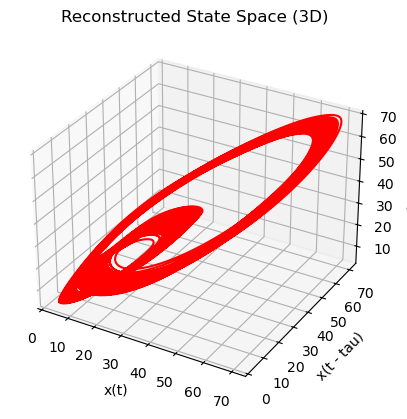

In [48]:
import numpy as np
import matplotlib.pyplot as plt
# Parámetros para la reconstrucción del espacio de fases
numpoints = len(data1)
timelag = tau  # Tau calculado previamente
embeddingdimension = dE  # calculado previamente
numsamples = numpoints - (embeddingdimension - 1) * timelag
stateSpace = np.zeros((embeddingdimension, numsamples))

# Reconstrucción del espacio de fases
for i in range(embeddingdimension):
    stateSpace[i, :] = data1[i * timelag : numsamples + i * timelag]

# Graficar el espacio de fase reconstruido en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(stateSpace[0, :], stateSpace[1, :], stateSpace[2, :], 'r', linewidth=1.5)

# Etiquetas y título
ax.set_title('Reconstructed State Space (3D)')
ax.set_xlabel('x(t)')
ax.set_ylabel('x(t - tau)')
ax.set_zlabel('x(t - 2*tau)')
ax.grid(True)

# Mostrar la gráfica
plt.show()

In [70]:
from libreriasNONAn.LyE_W import LyE_W
[out,LyE]=LyE_W(data1,sampling_rate,tau,dE,50*sampling_rate);
from libreriasNONAn.corrdim import correlation_dimension
COd=(data1, tau, dE);
from libreriasNONAn.Ent_Samp import Ent_Samp


In [72]:
print(COd)

(0         3.411162
1         3.431896
2         3.453720
3         3.476662
4         3.498610
           ...    
47996    15.572315
47997    14.934370
47998    14.305664
47999    13.688440
48000    13.084995
Name: Knee Flexion LT (deg), Length: 48001, dtype: float64, 5, 5)
